In [1]:
# initial setup
import pandas as pd
import numpy as np
#from collections import Counter
from itertools import chain

# read the test and train data
def readdata():
    data = pd.read_csv('../data/train.csv')
    train_x = data.drop(['playtime_forever'], axis=1)
    train_y = data['playtime_forever']
    test_x= pd.read_csv('../data/test.csv')
    all_x=pd.concat([train_x,test_x],axis=0)
    all_x.index=range(0,len(all_x))
    return all_x,train_y

In [2]:
# split
def split(row_x):

    # row
    l=list(row_x)
    for i in range(len(l)):
        l[i]=l[i].replace(' ', '').replace('\'', '')
        l[i]=l[i].split(',')
    
    #column
    columns_name=list(set(list(chain(*l))))
    re_x=np.zeros((len(row_x),len(columns_name)),dtype=int)
    for i in range(len(row_x)):
        for j in range(len(columns_name)):
            re_x[i,j]=columns_name[j] in l[i]
    return pd.DataFrame(data=re_x,columns=columns_name,index=range(0,len(row_x)))

In [3]:
# time
def reqtime(row_time):
    
    month=pd.to_datetime(row_time).dt.month
    year=pd.to_datetime(row_time).dt.year

    re_t=np.zeros(len(year))
    for i in range(len(year)):
        re_t[i]=year[i]*12+month[i]
    return re_t

# preprocessing
def preprocess(x):

    processed_x=pd.DataFrame(1-x["is_free"]*1)
    processed_x['price']=x['price']

    processed_x['purchase_date']=reqtime(x['purchase_date'])
    processed_x['release_date']=reqtime(x['release_date'])
    
    # Timestamp('2019-09-07 00:00:00')
    processed_x['wait_data']=(pd.to_datetime(x['purchase_date'])-pd.to_datetime(x['release_date']))/np.timedelta64(1, 'D')

    processed_x['hold_data']=(pd.Timestamp('2019-09-07 00:00:00')-pd.to_datetime(x['purchase_date']))/np.timedelta64(1, 'D')
    
    processed_x['total_positive_reviews']=x['total_positive_reviews']
    processed_x['total_negative_reviews']=x['total_negative_reviews']
    processed_x['reviews_rate']=x['total_positive_reviews']/x['total_negative_reviews']
    processed_x=pd.concat([processed_x,splid(x['genres'])],axis=1)
    processed_x=pd.concat([processed_x,splid(x['categories'])],axis=1)
    processed_x=pd.concat([processed_x,splid(x['tags'])],axis=1)
    return processed_x

In [42]:
# processing all data
processed_all_x.head()

,is_free,price,purchase_date,release_date,wait_data,hold_data,total_positive_reviews,total_negative_reviews,reviews_rate,Simulation,...,Touch-Friendly,CityBuilder,StoryRich,MOBA,Sandbox,4PlayerLocal,Transhumanism,DynamicNarration,Action-Adventure,BattleRoyale
0,1,3700.0,24223.0,24168.0,1665.0,432.0,372.0,96.0,3.875000,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0.0,24203.0,24188.0,472.0,1015.0,23.0,0.0,inf,0,...,0,0,0,0,0,0,0,0,0,0
2,1,5000.0,24223.0,24169.0,1616.0,432.0,3018.0,663.0,4.552036,0,...,0,0,1,0,0,0,0,0,0,0
3,1,9900.0,24203.0,24123.0,2434.0,1013.0,63078.0,1746.0,36.127148,0,...,0,0,0,0,1,0,0,0,0,0
4,1,4800.0,24219.0,24151.0,2043.0,552.0,8841.0,523.0,16.904398,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
# description
data = pd.read_csv('../data/train.csv')
a=data['is_free']#'playtime_forever'
time=data['playtime_forever']

# print summation of mean and variable time
print(sum(a),np.mean(time[a]),np.var(time[a]))
print(sum(1-a),np.mean(time[1-a]),np.var(time[1-a]))

31 2.3634408602150527 43.78138744363508
326 0.015219421101774041 2.20262396897757e-05


In [51]:
all_x,train_y=readdata()

processed_all_x=preprocess(all_x)

# import some functions from sklearn
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp = imp.fit(processed_all_x)
processed_all_x_2 = imp.transform(processed_all_x)

processed_all_x_2.astype(int)
processed_all_x_2.shape

from sklearn.preprocessing import StandardScaler
ss_x = StandardScaler()
processed_all_x_3  = ss_x.fit_transform(processed_all_x_2 )

from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler(feature_range=(0,1))
processed_all_x_4=mm.fit_transform(processed_all_x_2)


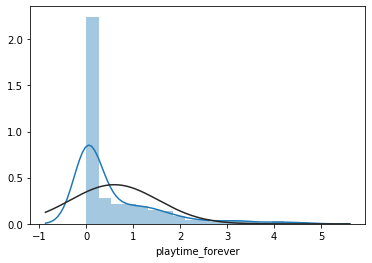

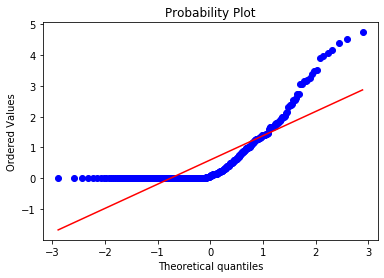

In [31]:
# some more setup
from scipy import stats
from scipy.stats import  norm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns       
from scipy import stats
from scipy.stats import  norm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
import sklearn
import warnings
warnings.filterwarnings('ignore')


def plot_y(train_y1):
    train_y1=np.log(train_y+1)
    sns.distplot( train_y1, fit=norm)
    fig = plt.figure()
    res = stats.probplot(train_y1, plot=plt)
plot_y(train_y1)

In [23]:
# import some functions from sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def rmse(xx,xxx):
    return mean_squared_error(xx,xxx)**0.5

from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import PassiveAggressiveRegressor 
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import SGDRegressor 
from sklearn.linear_model import TheilSenRegressor 

from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import RadiusNeighborsRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor

import warnings
warnings.filterwarnings("ignore")

# classification and names of all models
def allmodel():
    classifiers = [
    AdaBoostRegressor(),
    BaggingRegressor(),
    ExtraTreesRegressor(),
    GradientBoostingRegressor(),
    RandomForestRegressor(),
    PassiveAggressiveRegressor(),
    KNeighborsRegressor(),
    DecisionTreeRegressor(),
    ExtraTreeRegressor()
]
    names = [
    "AdaBoostRegressor",
    "BaggingRegressor",
    "ExtraTreesRegressor",
    "GradientBoostingRegressor",
    "RandomForestRegressor",
    "PassiveAggressiveRegressor",
    "KNeighborsRegressor",
    "DecisionTreeRegressor",
    "ExtraTreeRegressor"
]
    
    return classifiers,names
    classifiers,names=allmodel()

In [75]:
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(input_x,input_y, test_size=.1, random_state=1)
    
    result=[]
    for clf,name in zip(classifiers,names):
        clf.fit(X_train, y_train)
        a=clf.predict(X_test)
        a[a<0]=0
        result.append(rmse(a,y_test))
        
    # results from the models
    
    model_result=pd.DataFrame(data=result,index=names,columns=['rmse']).sort_values(by="rmse" , ascending=True)
    print(model_result)
    

                                 rmse
BaggingRegressor             9.205096
KNeighborsRegressor          9.478472
DecisionTreeRegressor        9.510007
AdaBoostRegressor            9.623674
GradientBoostingRegressor    9.700380
ExtraTreesRegressor          9.820556
RandomForestRegressor        9.840364
ExtraTreeRegressor           9.931072
PassiveAggressiveRegressor  10.035193
                                rmse
PassiveAggressiveRegressor  5.121390
ExtraTreeRegressor          8.983822
RandomForestRegressor       9.184058
BaggingRegressor            9.361188
KNeighborsRegressor         9.478472
ExtraTreesRegressor         9.512290
AdaBoostRegressor           9.592968
GradientBoostingRegressor   9.748184
DecisionTreeRegressor       9.997377
                                 rmse
PassiveAggressiveRegressor   6.633091
ExtraTreeRegressor           8.263835
BaggingRegressor             8.962155
ExtraTreesRegressor          9.301451
KNeighborsRegressor          9.478472
AdaBoostRegressor     

In [71]:
usedataset=processed_all_x_2[:,0:9]

input_x=usedataset[0:357,:]
input_y=train_y

In [6]:
import xgboost as xgb

xgboost_model = xgb.XGBRegressor(colsample_bytree = 0.4603, gamma = 0.0468, learning_rate = 0.05, max_depth = 3, min_child_weight = 1.7817, n_estimators = 2200, reg_alpha = 0.4640, reg_lambda = 0.8571, subsample = 0.5213, silent = 1, random_state = 7, nthread = -1)

X_train, X_test, y_train, y_test = train_test_split(input_x, input_y, test_size = .3, random_state = 111222)
xgboost_model.fit(X_train, y_train)

# Run prediction on training set
y_pred = xgboost_model.predict(X_test)

In [5]:
print('RMSE:', mean_squared_error(y_test, y_pred)**0.5)

RMSE: 13.344503327657241


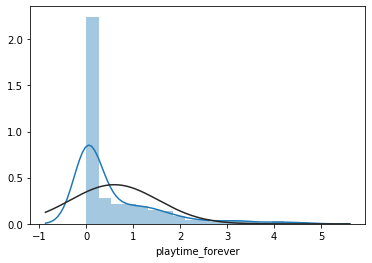

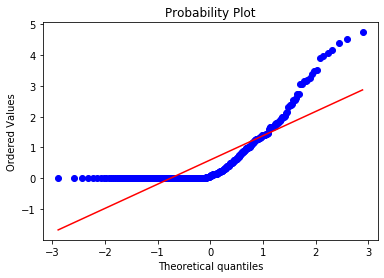

In [32]:
np.mean(y_pred)
plot_y(y_pred)

In [76]:
# final prediction 

clf=PassiveAggressiveRegressor()
clf.fit(usedataset[0:357,:],input_y)
a=clf.predict(usedataset[357:,:])
a[a<0]=0

# creating the submission notebook, which is the resulting notebook
# saving it as a csv file, like the samplesubmission notebook

sub=pd.DataFrame({'id':np.arange(90),'playtime_forever':a})
sub.to_csv('submission.csv',index=False)